# Прогнозирование оттока клиентов фитнес-центра

**Описание задачи.**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами?
Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно:
чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил нас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Звадача — провести анализ и подготовить план действий по удержанию клиентов.

 **Описание данных**

Данный находятся в файле `gym_churn.csv`.
Описание полей:
- `gender` — пол;
- `Near_location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба;
- `Promo_freinds` — факт первоначальной записи в рамках акции «приведи друга»;
- `Phone` — аличие контактного телефона;
- `Contract_period` — длительность текущего действующего абонемента в месяцах;
- `Group_visits` — факт посещения групповых занятий;
- `Age` — возраст;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Churn` — факт оттока в текущем месяце;


## Загрузка данных и изучение информации

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')  

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
data = df.copy()
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Все значения числовые, уже хорошо.

## Исследовательский анализ данных

Проверим данные на пропуски и дубликаты.

In [3]:
data.isna().sum()# пропусков в данных нет

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
data.duplicated().sum() # дубликатов ноль

0

Изучим средние значения и отклонения.

In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Много категориальных признаков, выраженных бинарных величинах 0 или 1. Но также есть и количественные. Средний возраст клиентов - 29 лет. Средняя длительность абонемента - 3 месяца, а вот медианная - 1. Из этого можно сделать вывод, что половина клиентов берет пробный абонемент на месяц. Понравится зал - возьмут уже большой, не понравится - уйдут. А может они не слишком уверенны,что будут ходить постоянно. Средний `Lifetime` - 3-4 месяца.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [6]:
target_groups = data.groupby('Churn').agg('mean').T
target_groups

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Сразу бросается в глаза различия групп по некоторым признакам. Это средняя длительность абонемента, ср. выручка меньше почти на треть, количество месяцев до окончания абонемента, лайфтайм и среднее количество посещений спортаза. Эти признаки должны быть определяющими для лояльности клиентов. Посмотрим на количественные признаки более детально, а также посмотрим есть ли выбросы в данных.

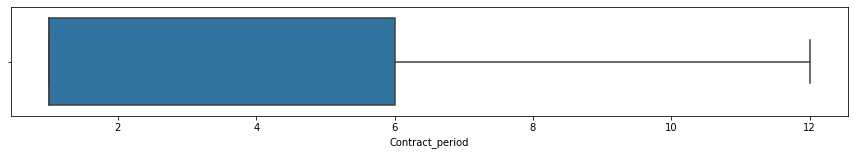

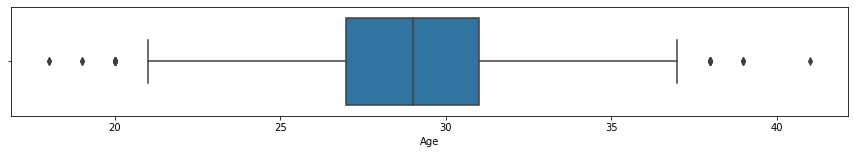

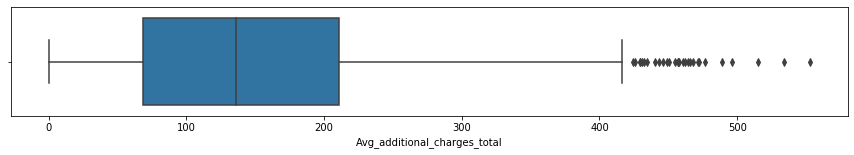

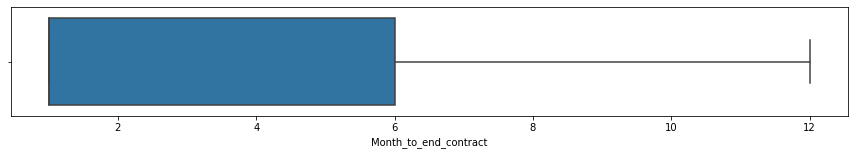

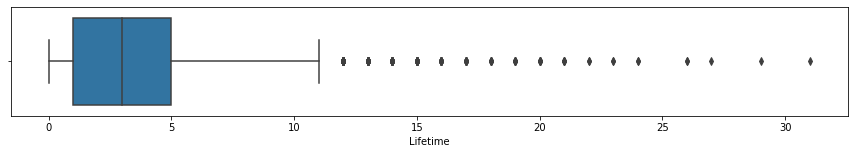

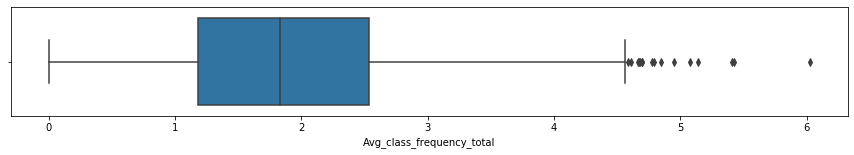

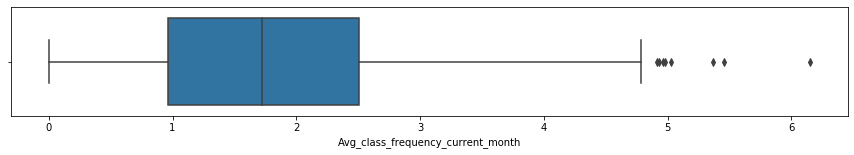

In [7]:
# выделим только количественные признаки,по категориальным боксплоты не имеет смысла строить
columnlist = ['Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract',
              'Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']
for column in columnlist:
    plt.figure(figsize=(15,2))
    sns.boxplot(data[column],orient="h")
    plt.show()

По нескольким признакам есть выбросы. Особенно сильно по выручке и лайфтайму.

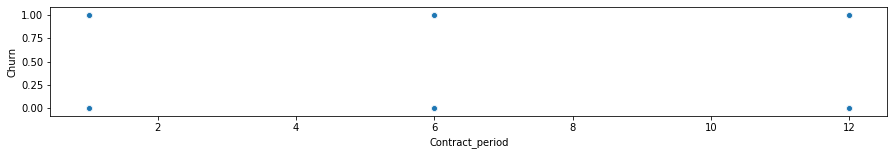

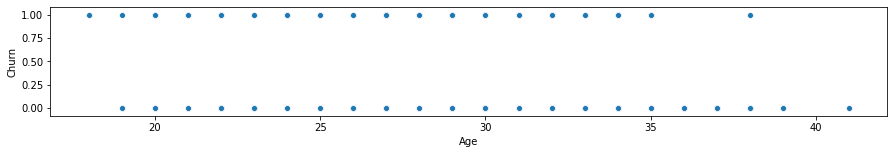

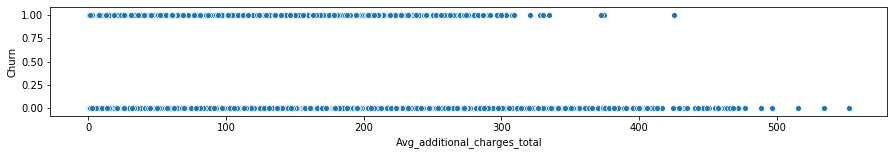

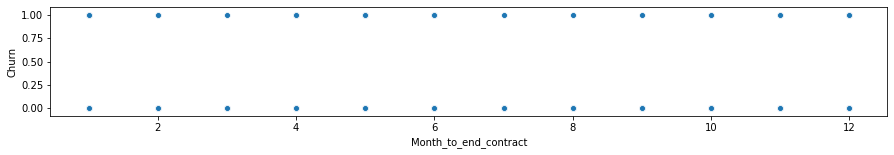

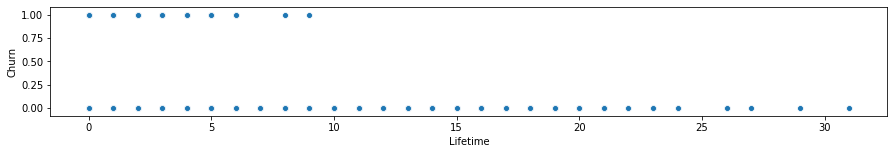

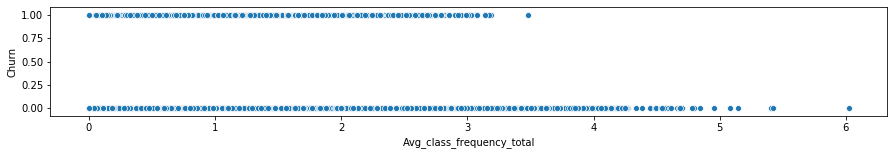

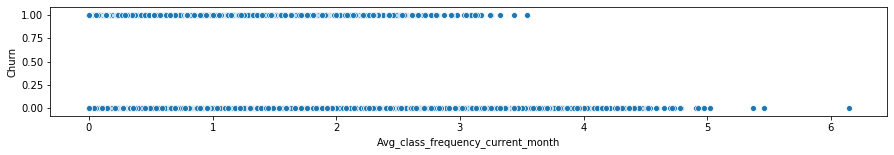

In [8]:
# посмотрим скэттеры
for column in columnlist:
    plt.figure(figsize=(15,2))
    sns.scatterplot(data[column], data['Churn'])
    plt.show()

А вот по скэтерам(целевая переменная - признак) не всё так очевидно. Выбросов по признакам по сути и нет. Лайфтайм ушедших не превышает 10 месяцев. Даже есть клиенты, которые ходят в зал по 5-6 дней в неделю!

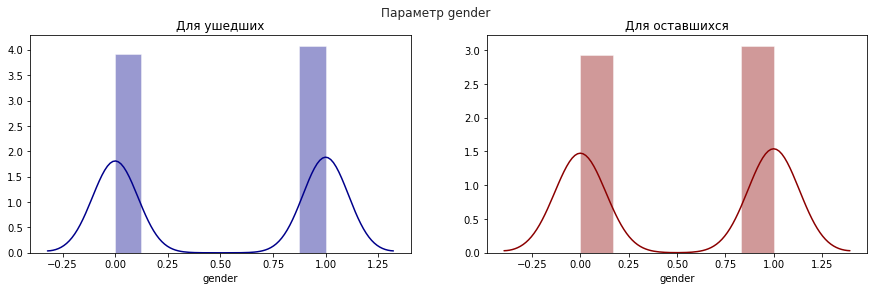

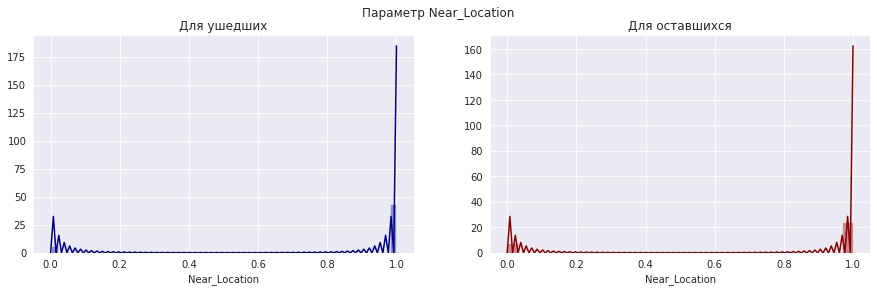

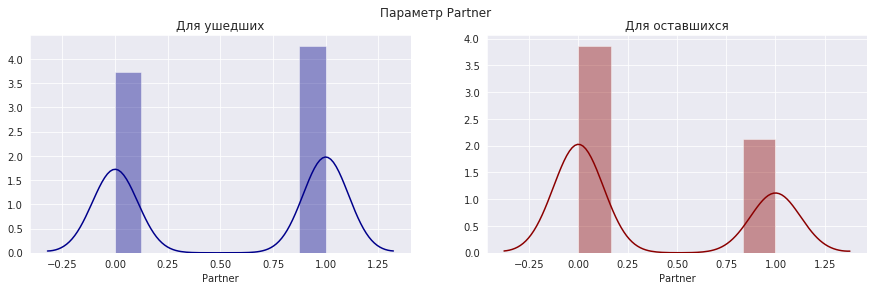

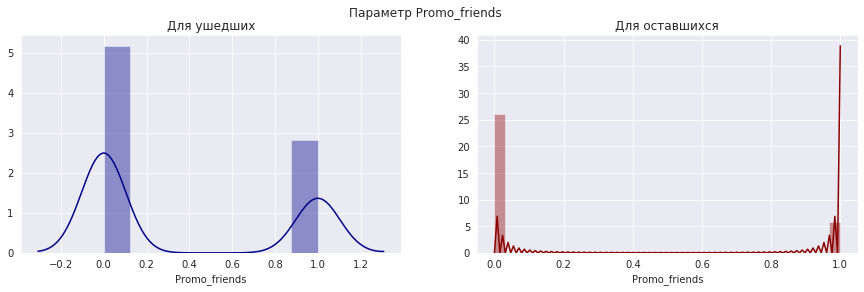

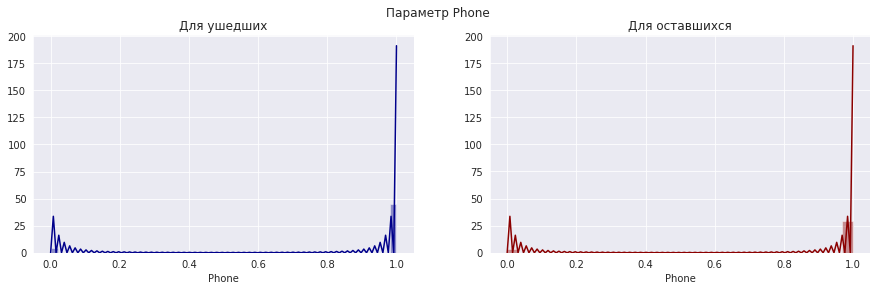

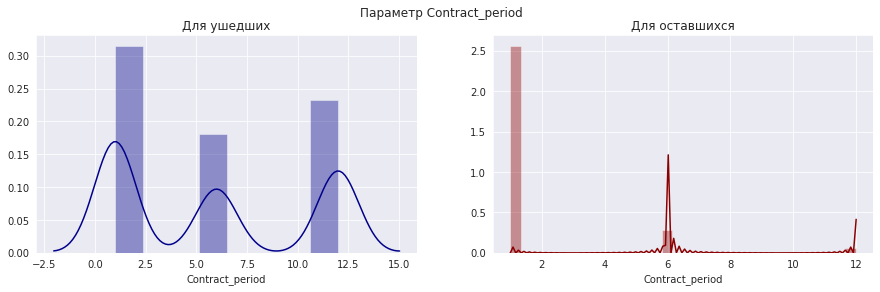

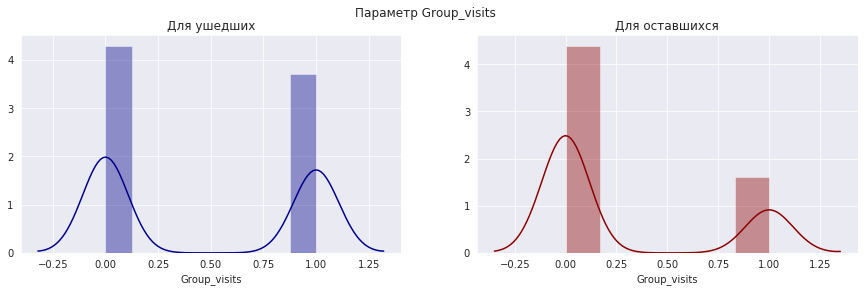

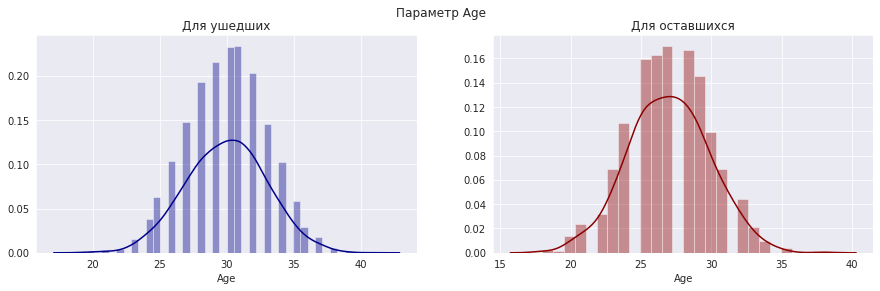

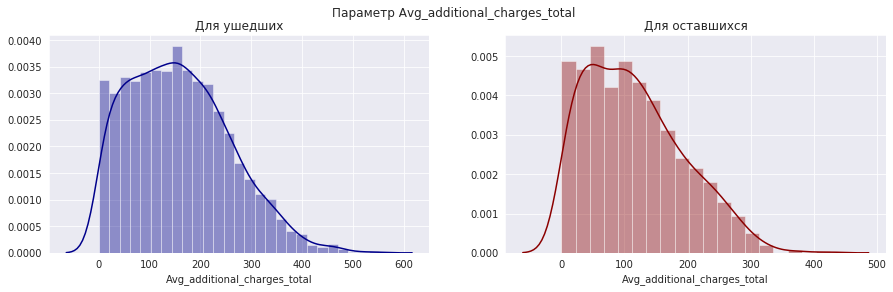

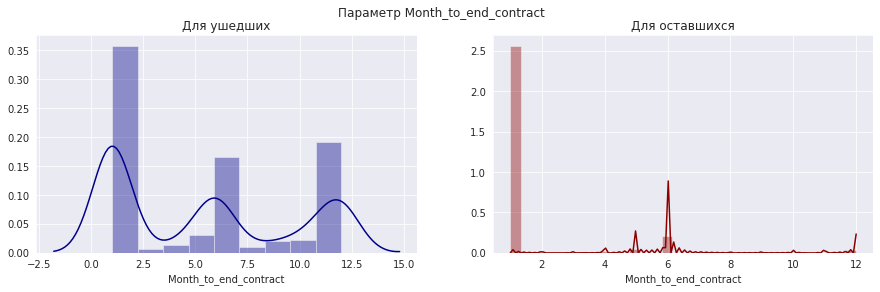

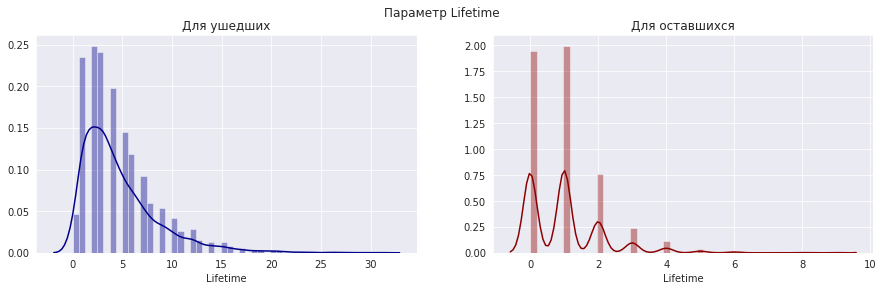

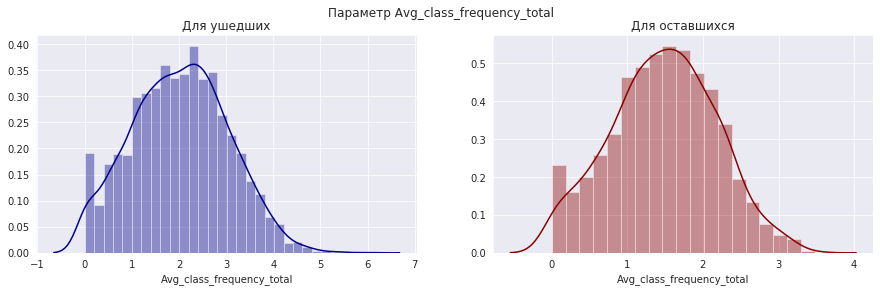

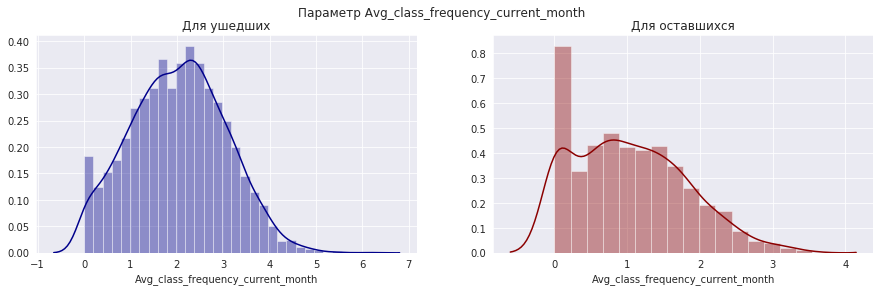

In [9]:
#Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
for column in data.drop('Churn',axis=1).columns:
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    sns.set_style('darkgrid')
    fig.suptitle("Параметр {}".format(column))
    
    sns.distplot(data[data['Churn'] == 0][column],ax=axes[0],color="darkblue")
    axes[0].set_title('Для ушедших')
    
    sns.distplot(data[data['Churn'] == 1][column],ax=axes[1], color="darkred")
    axes[1].set_title('Для оставшихся')
    plt.show()

Почти во всех количественных переменных видим нормальное распределение. Многие остальные параметры по группам примерно совпадают.

In [10]:
corr = data.corr() # посмотрим матрицу корреляций

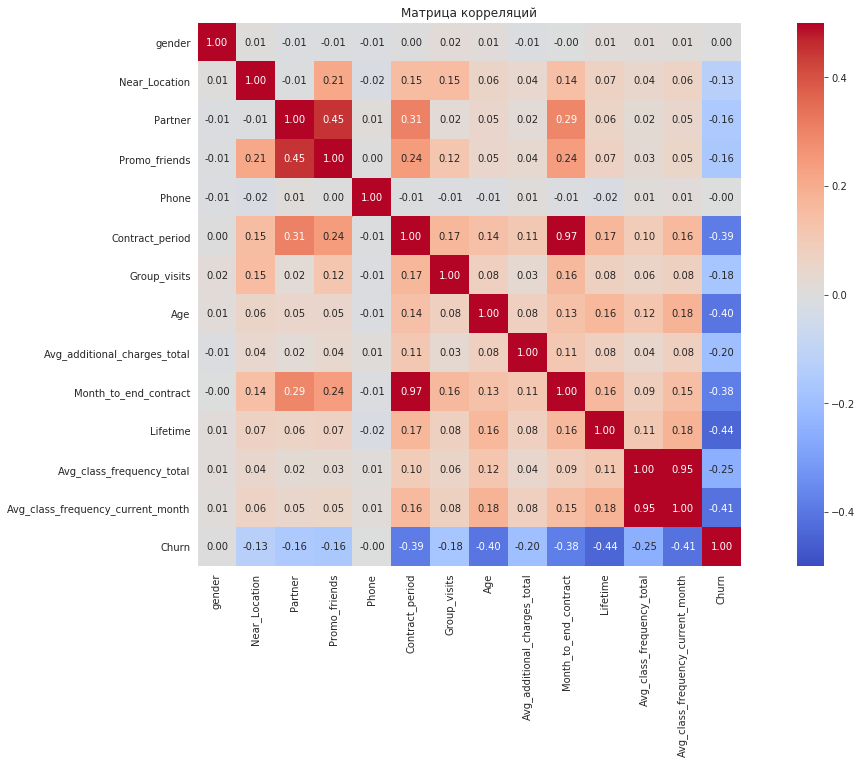

In [11]:
#sns.heatmap(corr, annot=True, fmt='d', ax=ax, cmap="viridis")
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot = True, square=True,fmt='.2f',vmin=-0.5, vmax=0.5,cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

2 признака по абонементам очень сильно коррелируют между собой. Признаки средних посещений тоже. У остальных параметров корреляция либо слабая, либо близкая к нулю. Целевая переменная вообще обратнокоррелирована почти со всеми. Сразу видно наиболее важные признаки для целевой переменной: длительность и остаток абонемента, возраст, лайфтайм и количество посещений в неделю. Чтобы избавиться от сильной корреляции признаков и не снизить производительность обобщения данных избавимся от `Month_to_end_contract` и `Avg_class_frequency_current_month`.

In [12]:
data = data.drop(columns=['Month_to_end_contract','Avg_class_frequency_current_month'])

## Модель прогнозирования оттока клиентов

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['Churn'])
y = data['Churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [15]:
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Обучим 2 модели на train-выборке, одну логистической регрессией, вторую случайным лесом. Оценим метрики `accuracy`, `precision`,`recall` и заодно `F1` и `ROC-AUC` для обеих моделей на валидационной выборке. Сравним по ним модели и выберем лучшую. 

In [16]:
model_1 = LogisticRegression(solver='liblinear')
model_2 = RandomForestClassifier(n_estimators = 100,random_state = 0)

In [17]:
model_1.fit(X_train, y_train) # обучим наши модели на тестовой выборке
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
predictions_1 = model_1.predict(X_test) # прогнозы
predictions_2 = model_2.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)[:, 1]
probabilities_2 = model_2.predict_proba(X_test)[:, 1]

In [19]:
print('Accuracy for LogisticRegression: {:.2f}'.format(accuracy_score(y_test, predictions_1)))
print('Precision for LogisticRegression: {:.2f}'.format(precision_score(y_test, predictions_1)))
print('Recall for LogisticRegression: {:.2f}'.format(recall_score(y_test, predictions_1)))
print('F1: for LogisticRegression: {:.2f}' .format(f1_score(y_test, predictions_1)))
print('ROC_AUC for LogisticRegression: {:.2f}'.format(roc_auc_score(y_test, probabilities_1)))
print('')
print('Accuracy for RandomForestClassifier: {:.2f}'.format(accuracy_score(y_test, predictions_2)))
print('Precision for RandomForestClassifier: {:.2f}'.format(precision_score(y_test, predictions_2)))
print('Recall for RandomForestClassifier: {:.2f}'.format(recall_score(y_test, predictions_2)))
print('F1 for RandomForestClassifier: {:.2f}' .format(f1_score(y_test, predictions_2)))
print('ROC_AUC for RandomForestClassifier: {:.2f}'.format(roc_auc_score(y_test, probabilities_2)))

Accuracy for LogisticRegression: 0.88
Precision for LogisticRegression: 0.76
Recall for LogisticRegression: 0.77
F1: for LogisticRegression: 0.77
ROC_AUC for LogisticRegression: 0.95

Accuracy for RandomForestClassifier: 0.89
Precision for RandomForestClassifier: 0.78
Recall for RandomForestClassifier: 0.77
F1 for RandomForestClassifier: 0.78
ROC_AUC for RandomForestClassifier: 0.94


In [56]:
# функция расчета метрик для модели. 
def model_metrics(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    print(m)
    print('Accuracy    : {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision   : {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall      : {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1          : {:.2f}' .format(f1_score(y_test, predictions)))
    print('ROC_AUC for : {:.2f}'.format(roc_auc_score(y_test, probabilities)))

In [62]:
model_metrics(LogisticRegression(solver='liblinear'), X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy    : 0.88
Precision   : 0.76
Recall      : 0.77
F1          : 0.77
ROC_AUC for : 0.95


In [65]:
model_metrics(LogisticRegression(solver='liblinear'), X_train_st, y_train, X_test_st, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy    : 0.90
Precision   : 0.79
Recall      : 0.81
F1          : 0.80
ROC_AUC for : 0.95


**На стадартизированных данных модель еще точнее работает.**

- Accuracy (точность прогнозирования)
- Precision (доля правильных ответов в пределах класса)
- Recall (количесто истиннопозитивных результатов)
- F1 (обобщеная оценка метрик Precision и Recall)
- ROC_AUC (площадь под кривой ошибок)

Судя по метрикам, модель случайного леса показывает себя чуть лучше модели логистической регрессии. Совсем чуть-чуть.

Посмотрим на веса признаков модели логистической регрессии и узнаем наиболее важные признаки. Для случайного леса увы такого нет.
![Image of Yaktocat](https://pictures.s3.yandex.net/resources/Screen_Shot_2020-01-26_at_20.40.40_1580060470.png)

In [21]:
features = pd.DataFrame(model_1.coef_.T, X.columns).reset_index()
features.columns = ['feature','coef']
features['coef'] = abs(features['coef'])
features.sort_values('coef',ascending=False)

,feature,coef
9,Lifetime,0.965818
6,Group_visits,0.640821
10,Avg_class_frequency_total,0.613667
3,Promo_friends,0.458202
5,Contract_period,0.266428
7,Age,0.200437
0,gender,0.154482
4,Phone,0.075997
1,Near_Location,0.007011
8,Avg_additional_charges_total,0.004908


Признаки `Lifetime`,`Group_visits`,`Avg_class_frequency_total`,`Promo_friends` имеют большие веса относительно друг друга и имеют большое влияние на целевую переменную. А вот `Near_Location`,`Avg_additional_charges_total` и `Partner` имеют очень малые веса и их влияние на целевую переменную почти не чувствуется.

## Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов):
- Стандартизируем данные
- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика увидим, какое количество кластеров можно выделить.
- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5.
- Посмотрим на средние значения признаков для кластеров.
- Построим распределения признаков для кластеров.

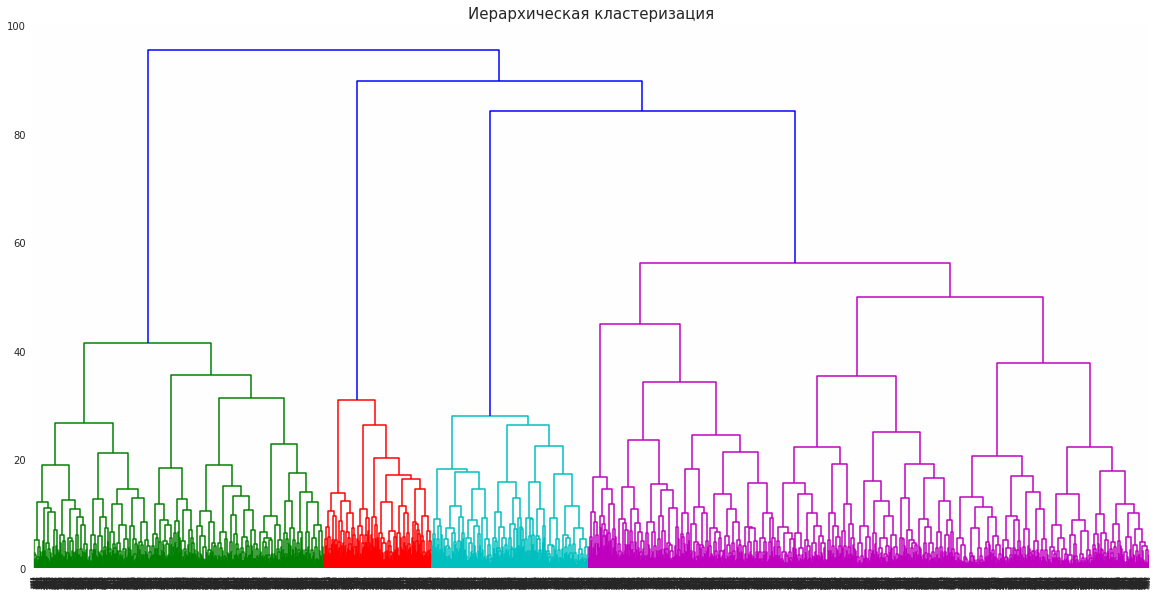

In [22]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация', fontsize=15)
plt.show()

Модель выделила 4 кластера. Визуально их также можно разделить и на 6-7. По условию у нас 5 кластеров. Доверимся модели.

In [23]:
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster'] = labels

In [24]:
df.groupby('cluster').mean().T

cluster,0,1,2,3
gender,0.524599,0.490354,0.499109,0.523316
Near_Location,1.000000,0.995981,0.000000,0.862694
Partner,0.176893,0.941318,0.488414,0.471503
Promo_friends,0.061913,0.772508,0.076649,0.305699
Phone,1.000000,1.000000,1.000000,0.000000
Contract_period,3.035931,7.787781,3.032086,4.777202
Group_visits,0.394140,0.513666,0.235294,0.427461
Age,28.974019,29.663183,28.721925,29.297927
Avg_additional_charges_total,143.390526,157.200280,137.540009,144.208179
Month_to_end_contract,2.858485,7.069936,2.853832,4.466321


Посмотрим на распредение признаков во всех кластерах.

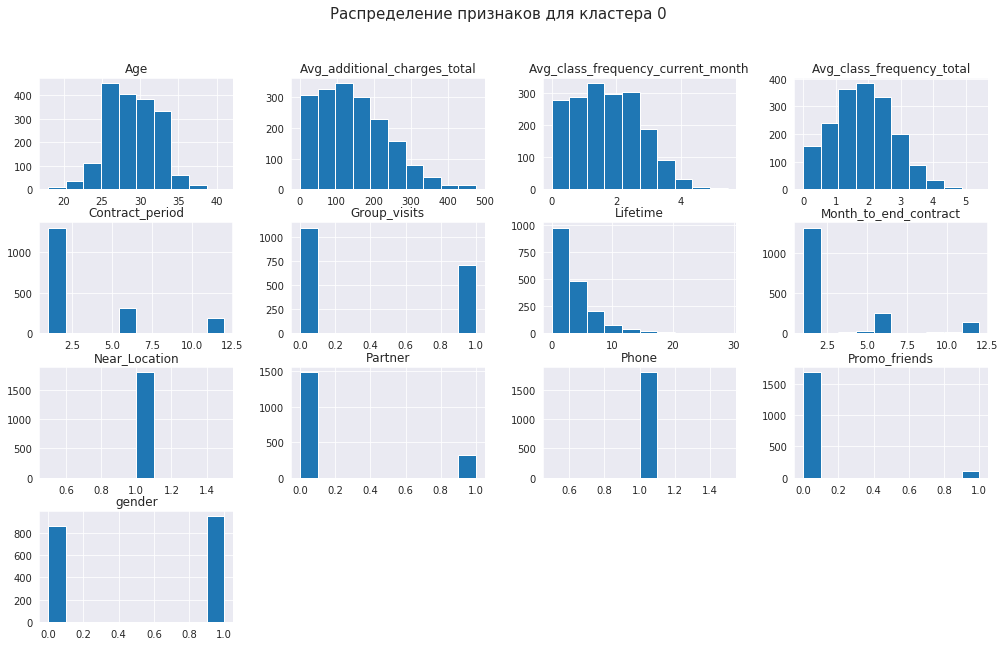

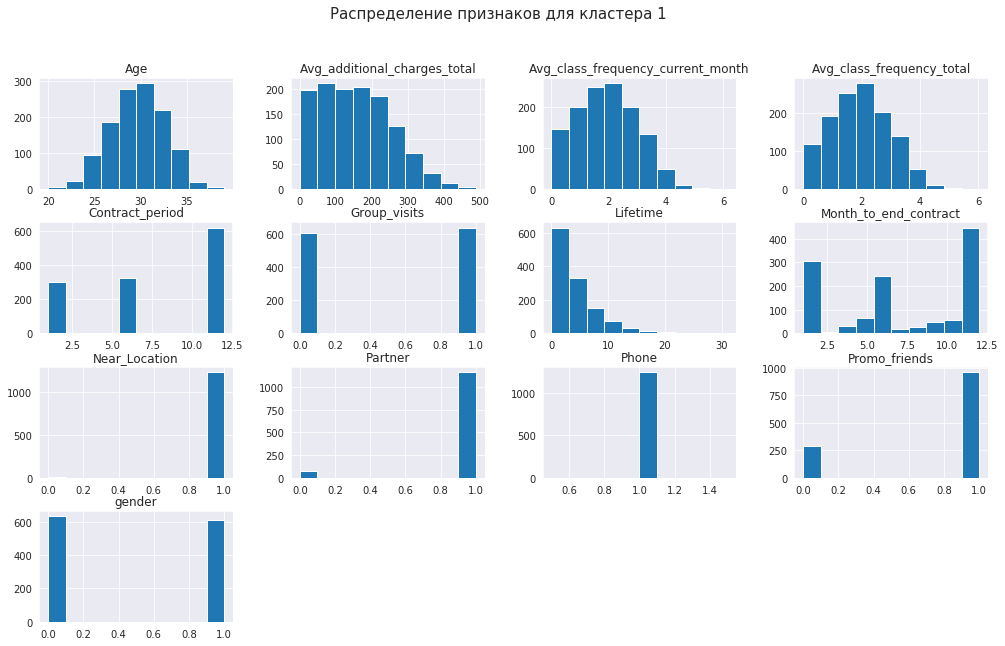

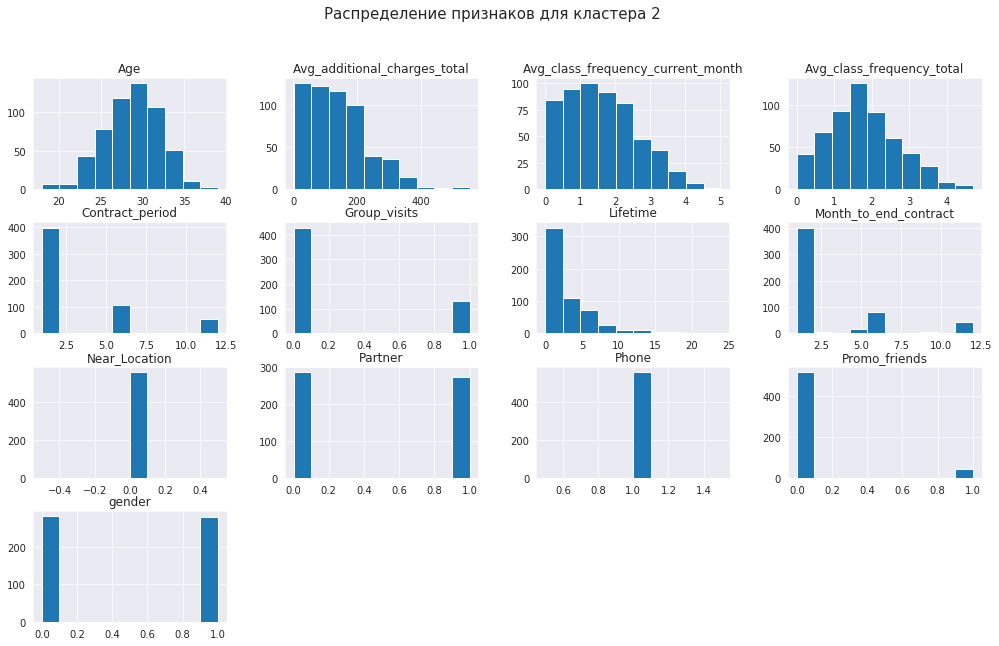

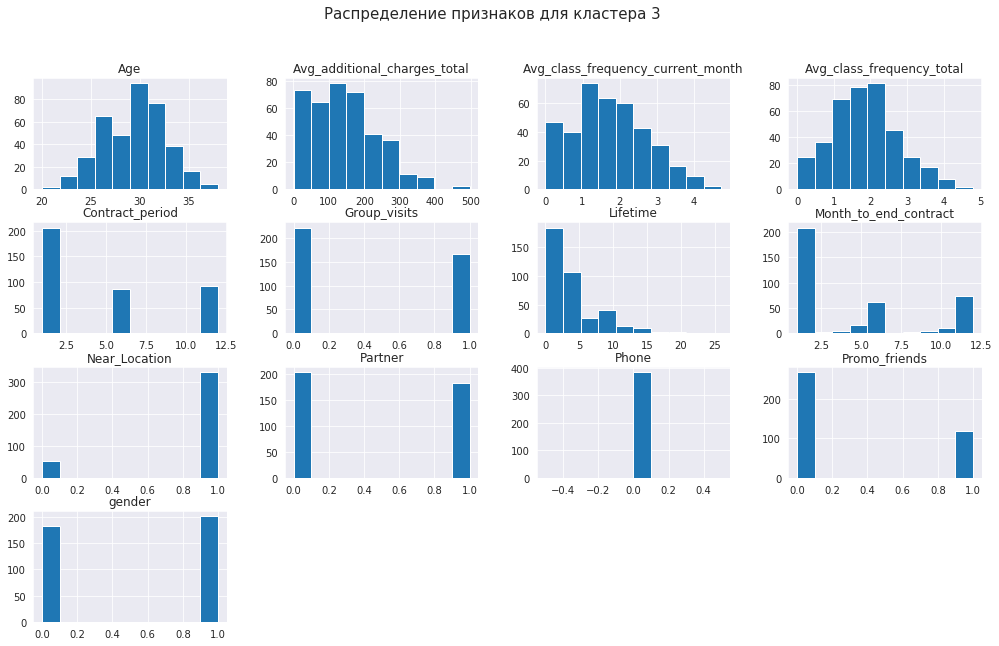

In [25]:
for cluster in [0, 1, 2, 3]: # переберем кластеры
    df[df['cluster']==cluster].drop(['Churn','cluster'], axis=1).hist(figsize=(17,10))
    plt.suptitle('Распределение признаков для кластера {}'.format(cluster), fontsize = 15)
    plt.show()

In [26]:
df.groupby('cluster').agg({"Churn" : ['mean','count']}) # процент оттота и размерность кластеров.

Churn      
             mean count
cluster                
0        0.332781  1809
1        0.106109  1244
2        0.399287   561
3        0.266839   386

Исходя из данных, самый надежный - 1 кластер, самый текучий - 2 кластер. Больше всего клиентов в 0 кластере,но показатель оттока довольно высокий.

Попробуем совместить признаки воедино по кластерам

In [27]:
# разделим признаки на бинарные и количественные
columnlist1 = ['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits','Contract_period']
columnlist2 = ['Age','Lifetime','Avg_additional_charges_total','Avg_class_frequency_total','Avg_class_frequency_current_month','Month_to_end_contract']

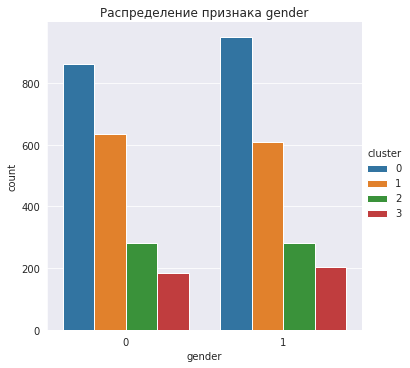

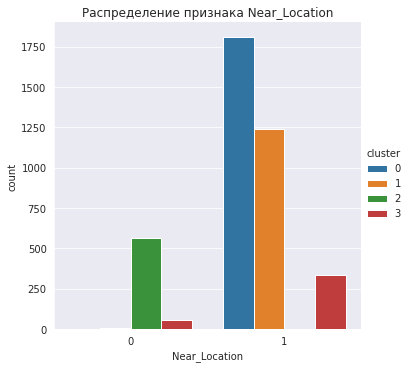

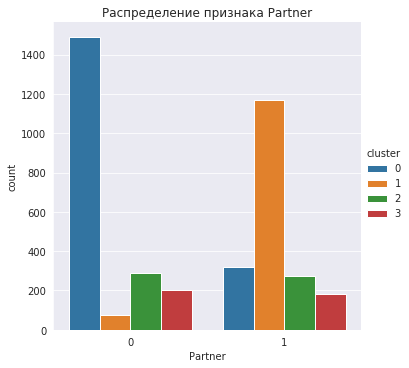

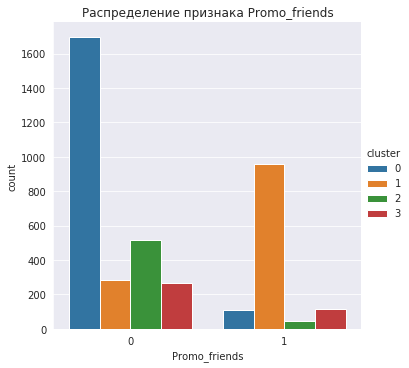

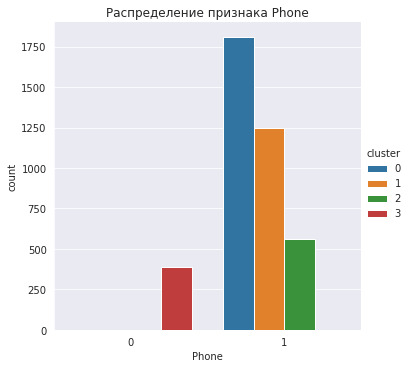

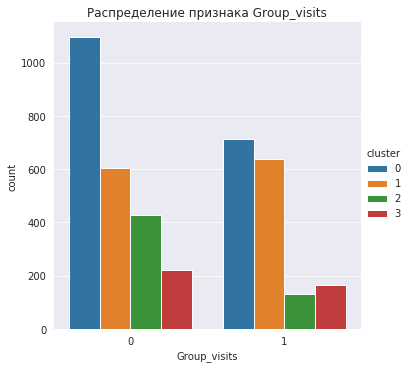

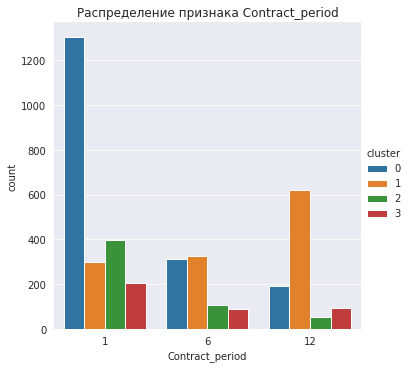

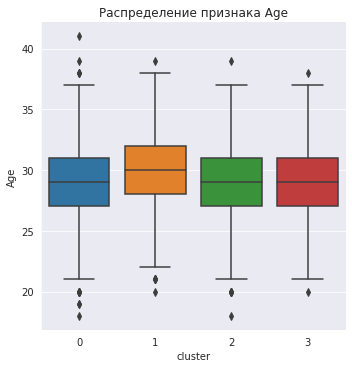

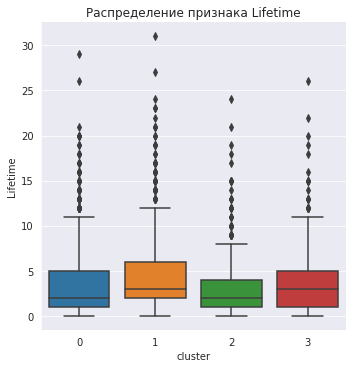

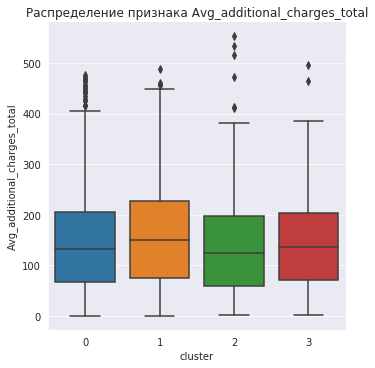

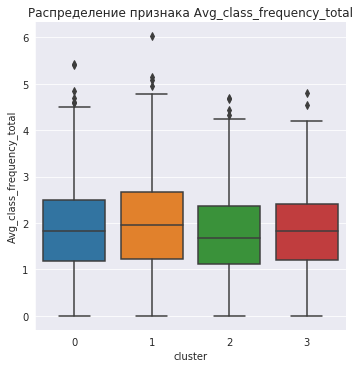

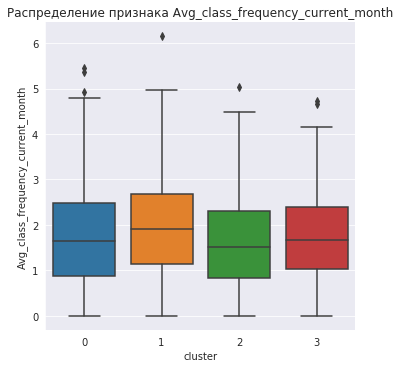

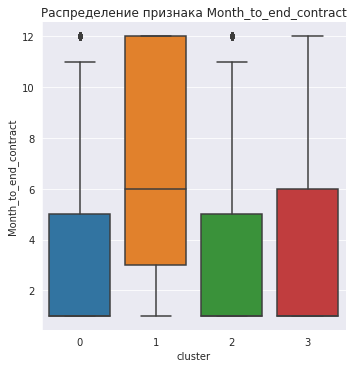

In [28]:
for column in columnlist1:
    sns.catplot(x=column, hue="cluster", kind="count", data=df)
    plt.title('Распределение признака {}'.format(column))
    plt.show()
for column in columnlist2:
    sns.catplot(x="cluster", y=column, kind="box", data=df)
    plt.title('Распределение признака {}'.format(column))
    plt.show()

0 кластер - Доля партнерства самая низкая, период абонемента в 1 месяц, спорт-зал рядом с работой или домом. Отток - 33%.

1 кластер - В основном партнеры или пришел по приглашению друга, абонементы в среднем на 6-12 месяцев, высокая доля групповых занятий, лайфтайм самый высокий, количество посещений самое высокое. Отток - 7%.

2 кластер - Локация далеко от дома и работы, приглашение от друга минимальное, период абонемента 1 месяц, лайфтайм ниже остальных, количество посещений самое низкое. Отток - 40%.

3 кластер - Нет контактных телефонов, период абонементов 3-6 месяцев, лайфтайм относительно высокий. Отток - 26%.

## Выводы и рекомендации

В ходе исследования обучили и оценили 2 модели для прогнозирования: модель логистической регрессии и модель случайного леса. Случайный лес показал чуть более точные прогнозы по метрикам.

**Анализ общих данных:**
- Распределение по полу примерно равное
- Средний возраст 29 лет
- Большая часть клиентов живет/работает рядом с фитнес-клубом
- Около половины клиентов пришли по партнерской программе
- 30% пришли по программе "Приведи друга"
- Большая часть клиентов оставляет свои контактные телефоны
- 40% посещают групповые занятия
- Средняя длительность абонемента - 4.7 месяца(медиана 1 месяц), средний срок до истечения - 3.7 месяца(медиана 1 месяц.)
- Средняя выручка от клиента на доп.услуги - 146
- Средняя частота посещений в неделю ~ 1.8 раза ()
- Доля оттока клиентов - 26.5%

**Выводы по признакам на отток пользователей:**
- Клиенты живущие/работающие рядом с клубом реже попадают в отток
- Сотрудники компаний-партнеров более лояльны и реже попадают в отток. Компании часто берут часть расходов на себя.
- По программе "Приведи друга" люди тоже более лояльны. По-видимому в клуб ходят не одни, а вместе с другом.
- Лояльные пользователи чаще ходят на групповые занятия
- Лояльные клиенты чаще посещают клуб в неделю
- У большей части клиентов абонементы на 1 месяц. И среди них наблюдается максимальная доля оттока. Кто-то берет короткий абонемент и приходит в клуб на разведку. Кто-то неуверен в том, что он будет посещать клуб регулярно. Но если, клиенты берут более длительный абонемент, то доля оттока среди них резко снижается.

**Рекомендации для стратегии взаимодействия с клиентами и их удержания**

У нас есть 2 модели, с примерно одинаковым качеством прогнозирования. Модель логистической регрессии показывает веса признаков влияния на целевую пременную оттока. Над наиболее весомыми признаками и нужно работать.

Партнерские программы и "Приведи друга" показывают хорошие результаты. Нужно продолжать их развивать.

Развивать спектр групповых занятий. Люди их любят. И чаще будут ходить в зал ради этого.

Главное это показатель лайфтайма. А лайфтайм это по сути производная от длительности абонемента. Учитывая, что больщая часть клиентов берет абонемент только на 1 месяц, то нужно стимулировать именно их.
Вполне возможно нужно ввести прогрессивный дисконт к цене. Например, для 3-месячного дать скидку в 15%, для 6-месячного 20%, для 12-месячного 30-35%. Лучше дать скидку и получать какое-то вэлью с лояльного клиента, чем не дать, потерять клиента навсегда и не получить вэлью вообще.